# Trabalho Prático 2 de Ciência de Dados 

### Descrição

Comparação de diferentes algoritmos para criação de modelos.

### Objetivos

1. Buscar e utilizar algoritmos não vistos na disciplina para tarefas de Regressão e Classificação.
2. Comparar os algoritmos escolhidos com conjuntos de dados reais utilizando métricas de avaliação vistas ou não na disciplina.

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210


# *Brazilian Houses to Rent*

![Kaggle - Brazilian Houses to Rent Dataset](https://i.imgur.com/wOKxor1.pnghttps://i.imgur.com/wOKxor1.png)

O dataset escolhido para realização deste trabalho trata-se do [*Brazilian Houses to Rent*](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent/code), disponível na comunidade de Ciência de Dados [*Kaggle*: *Your Home for Data Science*](https://www.kaggle.com/).

Escolhemos apenas este *dataset* para a realização do trabalho por possuir *features* (atributos) que podem ser utilizadas tanto para a tafera de Regressão quanto para a tarefa de Classificação.

![Kaggle - Brazilian Houses to Rent Dataset](https://drive.google.com/uc?id=1KgiGRYBMe6tiQWYOJU8vtr-zgGX6aiCj)

# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas de avaliação
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Regressão
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss # Classificação
from sklearn.metrics import plot_confusion_matrix # Classificação

DEFAULT_FONT_SIZE = 14
plt.rcParams['font.size'] = DEFAULT_FONT_SIZE

BASE_PATH = '.'
GRIDS_BASE_DIR = BASE_PATH + '/Grid Results'
MODELS_BASE_DIR = BASE_PATH + '/Best Models'

In [2]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/Modules')
import utils # Carregando funções utilitárias
import models # Carregando modelos

from importlib import reload

# Parte 3. Comparação Final das Tarefas de Regressão e Classificação

## Resumo da Definição dos Problemas



- **Tarefa de Regressão:**
> Predição do preço total (`total (R$)`) das casas com base nos seus atributos.

- **Tarefa de Classificação:**
> 1. Categorizar se uma casa aceita ou não animais (atributo alvo `animal`).
  2. Categorizar se uma casa está ou não mobiliada (atributo alvo `furniture`).

## Carregando os Melhores Modelos e os Conjuntos de Teste

Na Parte 2 deste trabalho, realizamos as etapas 1, 2 e 3 das listadas na figura abaixo:

<center>
  <img width="800" src="https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part3/kfold-selection.png" />
</center>

A descrição detalhada da figura pode ser encontrada neste [*link*](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html). 
A Parte 3 consiste de realizar a etapa de número 4:

4. Fazer a **comparação final** dos melhores modelos para cada uma das tarefas usando o **conjunto de teste**.

Assim, iremos carregar os melhores modelos salvos de cada tarefa, como também carregar seus conjuntos de teste. Iremos mostrar os resultados de forma visual para melhor entedimento e definir o melhor modelo para cada tarefa. Ao final, estão as considerações finais de todo o trabalho. 



### Regressão 

In [3]:
# Lendo o conjunto de teste da Regressão
test_reg = pd.read_json(BASE_PATH + '/Dataset/test_set_regression.json')

X_test_reg = np.stack(test_reg['X'].to_numpy())
y_test_reg = np.stack(test_reg['y'].to_numpy())

X_test_reg.shape, y_test_reg.shape

((2064, 12), (2064,))

In [4]:
reg_models_dir = MODELS_BASE_DIR + "/Regression"

# Carregando os modelos treinados
best_regression_models = models.train_regression_models(needs_to_train=False, 
                                                        models_path=reg_models_dir)

best_regression_models

Carregando os modelos...


{'knn': KNeighborsRegressor(metric='manhattan', n_neighbors=25, weights='distance'),
 'svr': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svr', SVR(C=3000, gamma='auto'))]),
 'decision_tree': DecisionTreeRegressor(),
 'linear_regression': LinearRegression(normalize=True)}

### Classificação

#### Atributo Animal

In [5]:
# Lendo o conjunto de teste da Classificação do atributo animal
test_animal = pd.read_json(BASE_PATH + '/Dataset/test_set_classification_animal.json')

X_test_animal =  np.stack(test_animal['X'].to_numpy())
y_test_animal = test_animal['y'].to_numpy()

X_test_animal.shape, y_test_animal.shape

((2064, 12), (2064,))

In [6]:
classif_animal_models_dir = MODELS_BASE_DIR + "/Classification/Animal"

# Carregando os modelos treinados
best_classification_animal_models = models.train_classification_models(needs_to_train=False,
                                                                       models_path=classif_animal_models_dir)

best_classification_animal_models

Carregando os modelos...


{'animal_decision_tree': DecisionTreeClassifier(),
 'animal_logistic_regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('LR',
                  LogisticRegression(C=0.001, penalty='none',
                                     solver='newton-cg'))]),
 'animal_svc': Pipeline(steps=[('scaler', StandardScaler()),
                 ('SVC',
                  BaggingClassifier(base_estimator=SVC(C=10, gamma='auto'),
                                    max_samples=0.06666666666666667,
                                    n_estimators=15))]),
 'animal_knn': Pipeline(steps=[('scaler', StandardScaler()),
                 ('KNN',
                  KNeighborsClassifier(metric='euclidean', n_neighbors=45))]),
 'animal_naive_bayes': GaussianNB(var_smoothing=1e-07)}

#### Atributo Furniture

In [7]:
# Lendo o conjunto de teste da Classificação do atributo furniture
test_furniture = pd.read_json(BASE_PATH + '/Dataset/test_set_classification_furniture.json')

X_test_furniture =  np.stack(test_furniture['X'].to_numpy())
y_test_furniture = test_furniture['y'].to_numpy()

X_test_furniture.shape, y_test_furniture.shape

((2064, 12), (2064,))

In [8]:
classif_furniture_models_dir = MODELS_BASE_DIR + "/Classification/Furniture"

# Carregando os modelos treinados
best_classification_furniture_models = models.train_classification_models(needs_to_train=False,
                                                                       models_path=classif_furniture_models_dir)

best_classification_furniture_models

Carregando os modelos...


{'furniture_logistic_regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('LR',
                  LogisticRegression(C=0.001, penalty='none',
                                     solver='newton-cg'))]),
 'furniture_svc': Pipeline(steps=[('scaler', StandardScaler()),
                 ('SVC',
                  BaggingClassifier(base_estimator=SVC(C=100, gamma='auto'),
                                    max_samples=0.06666666666666667,
                                    n_estimators=15))]),
 'furniture_knn': Pipeline(steps=[('scaler', StandardScaler()),
                 ('KNN',
                  KNeighborsClassifier(metric='chebyshev', weights='distance'))]),
 'furniture_decision_tree': DecisionTreeClassifier(),
 'furniture_naive_bayes': GaussianNB(var_smoothing=1e-11)}

## Comparação dos Melhores Modelos 

### Regressão

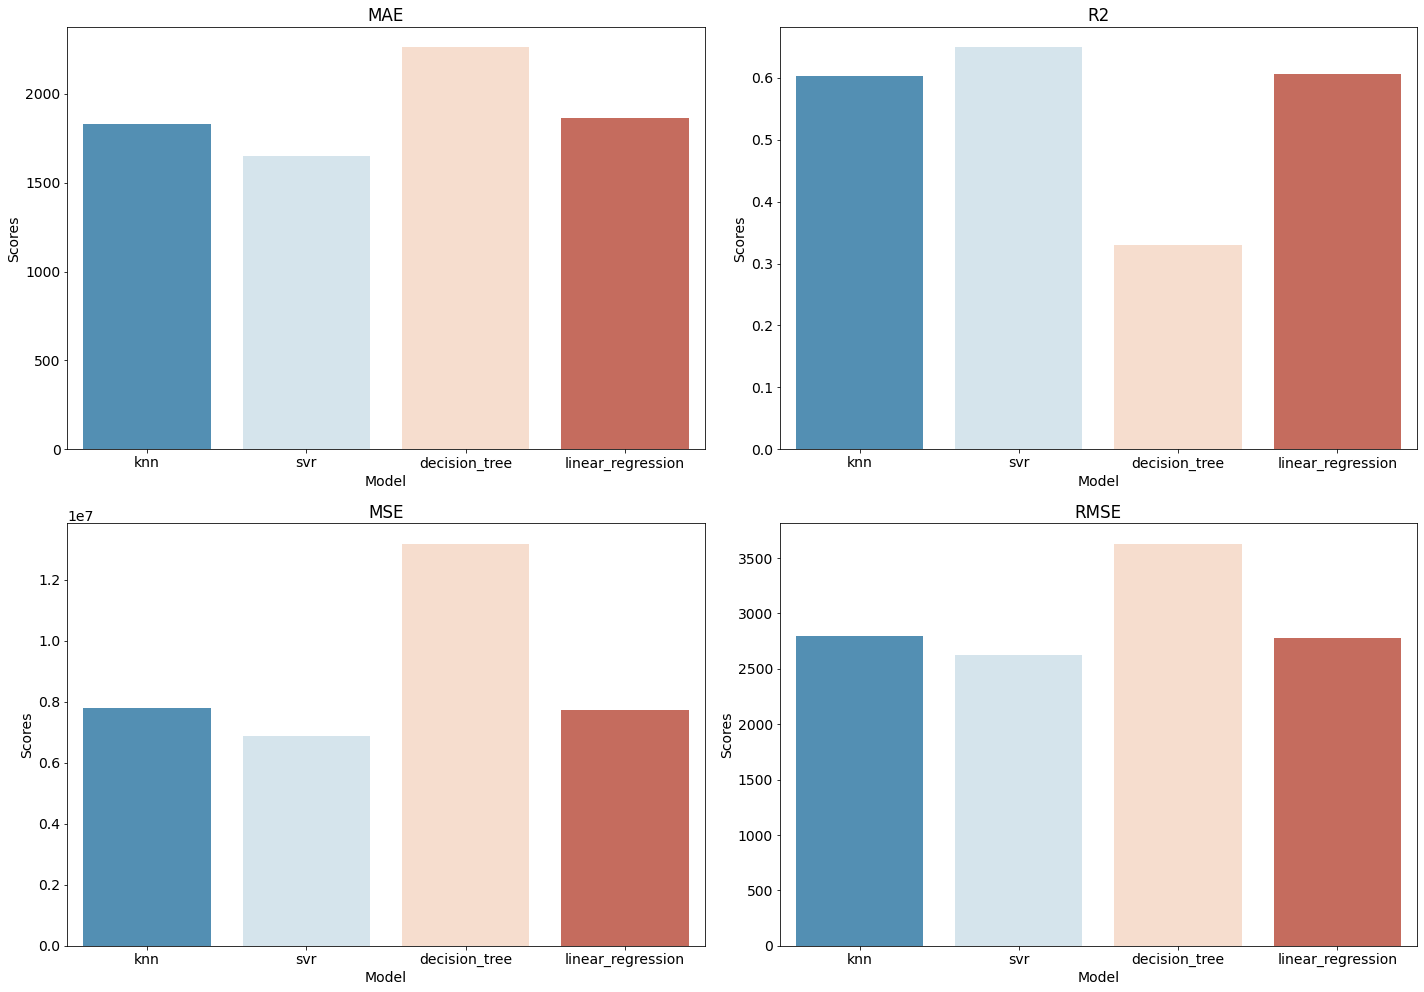

In [9]:
regression_scores = utils.compute_scores_best_models(X_test_reg,
                                               y_test_reg, 
                                               best_regression_models, 
                                               metrics=[mean_absolute_error, r2_score, mean_squared_error, utils.rmse],
                                               metric_names=['mae', 'r2', 'mse', 'rmse'])
score_data = pd.DataFrame(regression_scores).T
score_data.reset_index(inplace=True)
score_data.rename(columns={
    'index': 'Model',
    'mae': 'MAE',
    'r2': 'R2', 
    'mse': 'MSE',
    'rmse': 'RMSE'
}, inplace=True)

cols = list(score_data.columns[1:])

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
for index, ax in enumerate(axs.flat):
  sns.barplot(ax=ax, x='Model', y=cols[index], data=score_data, palette='RdBu_r')
  ax.set_title(cols[index])
  ax.set_ylabel('Scores')

fig.tight_layout()
plt.show()

- **Gráficos de densidade:**

> Visto que a média dos erros, aplicada em todas as métricas, poderia estar sendo afetada por valores grandes de erros de poucos padrões, buscamos analisar o gráfico de densidade dos erros. Com eles, podemos perceber que apesar da média dos erros ser relativamente alta, a grande maioria das predições apresentam erros baixos. Esse comportamento se repete em todos os 4 modelos.

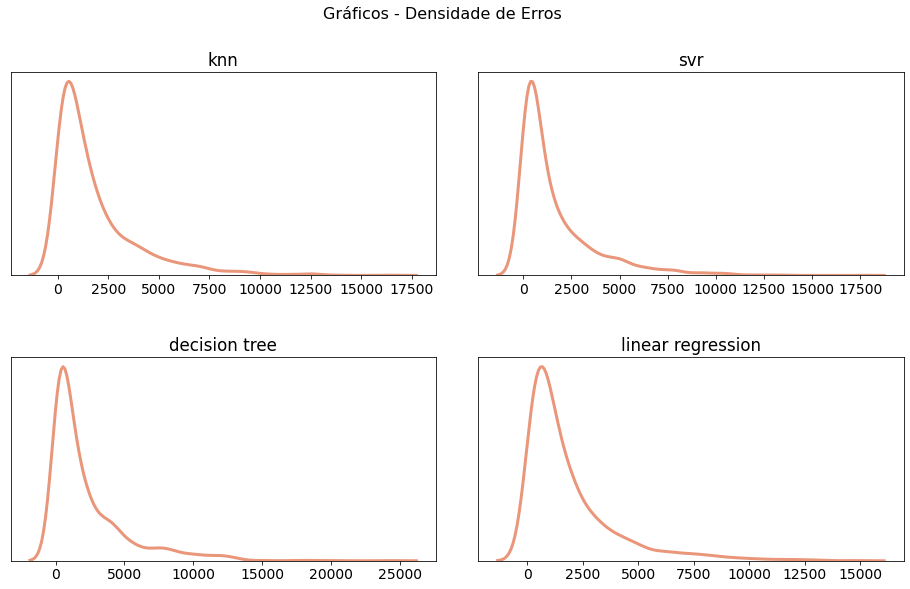

In [10]:
utils.plot_errors_densities_by_model(best_regression_models, X_test_reg, y_test_reg)

- **Melhor modelo:**

> Com os resultados do gráfico acima, claramente o modelo com melhor desempenho foi a SVR, por ter ganho em todas as métricas. Com o gráfico abaixo, podemos ver que o SVR foi capaz de reproduzir boa parte da distribuição original dos dados, exceto para os *outliers*. Também é importante notar que mesmo com vários *outliers* presentes nos dados, a distribuição produzida pelo modelo não foi afetada diretamente por eles.

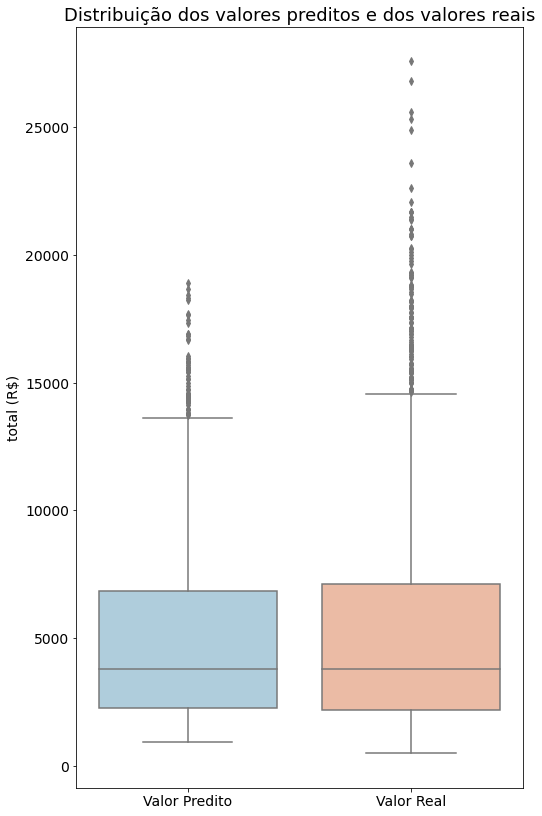

In [11]:
best_regression_model = best_regression_models["svr"]
y_pred_reg = best_regression_model.predict(X_test_reg)

plot_data = pd.DataFrame([(predict, "Valor Predito") for predict in y_pred_reg] + [(real_value, "Valor Real") for real_value in y_test_reg], columns=["total (R$)", ""])

plt.figure(figsize=(8, 14))
plt.title('Distribuição dos valores preditos e dos valores reais', fontsize=18)
sns.boxplot(x="", y="total (R$)", data=plot_data, palette='RdBu_r');

### Classificação

#### Atributo Animal

A seguir, plotamos os valores dos escores de cada métrica usada para classificação do atributo `animal`.

Podemos ver que todos os modelos foram muito bons (média de 86% para o F1-*score*) , com exceção da Árvore de Decisão, que ficou um pouco abaixo dos demais modelos. Não temos como escolher o melhor modelo, já que os 4 majoritários estão muito bons.

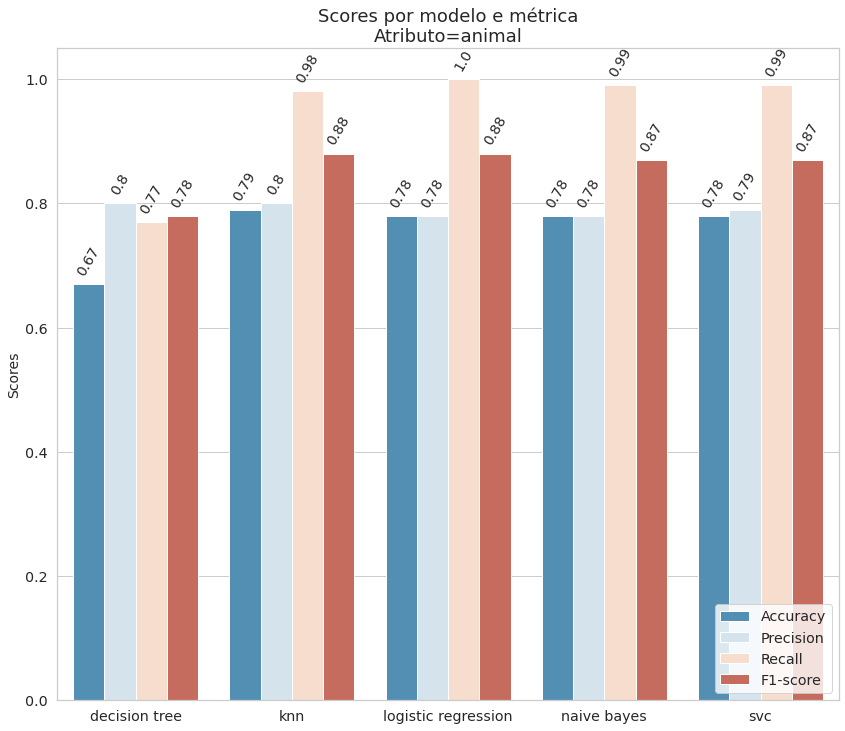

In [12]:
classif_animal_scores = utils.compute_scores_best_models(X_test_animal,
                                                         y_test_animal, 
                                                         best_classification_animal_models, 
                                                         metrics=[accuracy_score, precision_score, recall_score, f1_score, log_loss],
                                                         metric_names=['acc', 'p', 'r', 'f1', 'bce'])
score_data_animal = utils.classification_score_data(classif_animal_scores)

utils.plot_histogram_labels(x_label='Model', 
                            y_label='Score',
                            labels=score_data_animal['Score'].to_numpy(), 
                            hue_label='Metric', 
                            data=score_data_animal, 
                            palette='RdBu_r',
                            title='Scores por modelo e métrica\nAtributo=animal', 
                            ylabel_title='Scores', 
                            width=14, 
                            height=12)

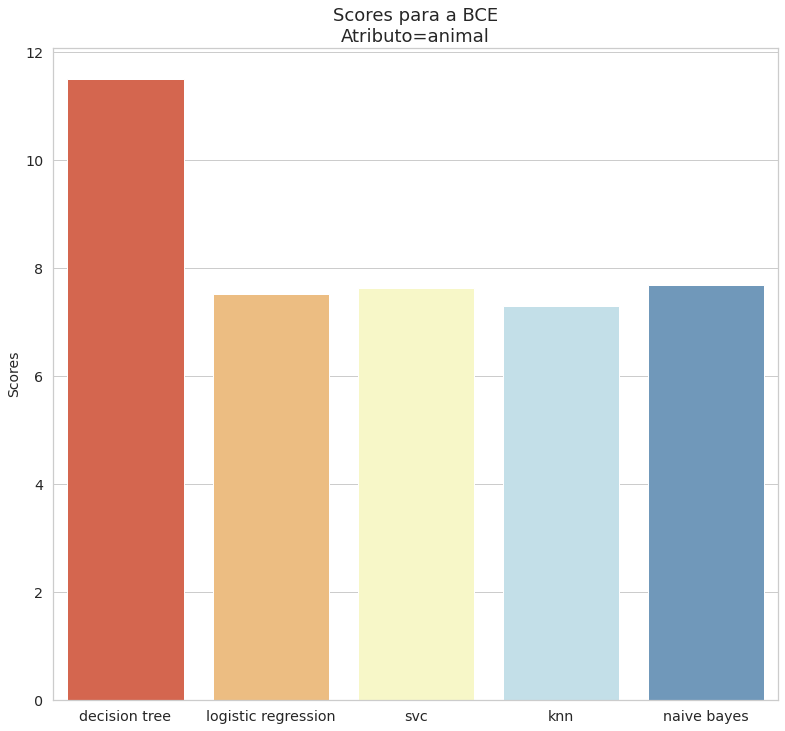

In [13]:
bce_scores_animal = pd.DataFrame(columns=['Model', 'Score'])

for model, scores in classif_animal_scores.items():
  bce_scores_animal = bce_scores_animal.append({
      'Model': ' '.join(model.split("_")[1:]),
      'Score': float('{:.2f}'.format(scores['bce']))
  }, ignore_index=True)
bce_scores_animal

sns.set(style='whitegrid', font_scale=1.3)
plt.figure(figsize=(13, 12))
sns.barplot(x='Model', y='Score', data=bce_scores_animal, palette='RdYlBu')

plt.title('Scores para a BCE\nAtributo=animal', fontsize=18)
plt.xlabel('')
plt.ylabel('Scores', fontsize=14)

plt.show()

- **Matrizes de confusão:**
> Uma matriz de confusão é uma tabela usada para descrever a performance de um modelo de classificação. Através de uma matriz de confusão é possível indicar os erros e acertos de um modelo. Uma explicação mais detalhada pode ser encontrada [aqui](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Basicamente, o que nos interessa são os valores presentes na diagonal secundária da matriz, que indica a quantidade de erros do modelo. 

  > Abaixo, estão os plots das matrizes de confusão de cada modelo. De acordo com as métricas, o pior modelo foi a Árvore de Decisão. De fato, a matriz de confusão desse modelo mostra que a quantidade de valores preditos erroneamente foi grande. No entanto, os melhores modelos apresentam um padrão: os valores preditos em sua maioria correspondem à classe mais frequente no *dataset*. De certa forma, esse comportamento já era esperado, devido à presença do desbalanceamento das classes visto na Parte 1.

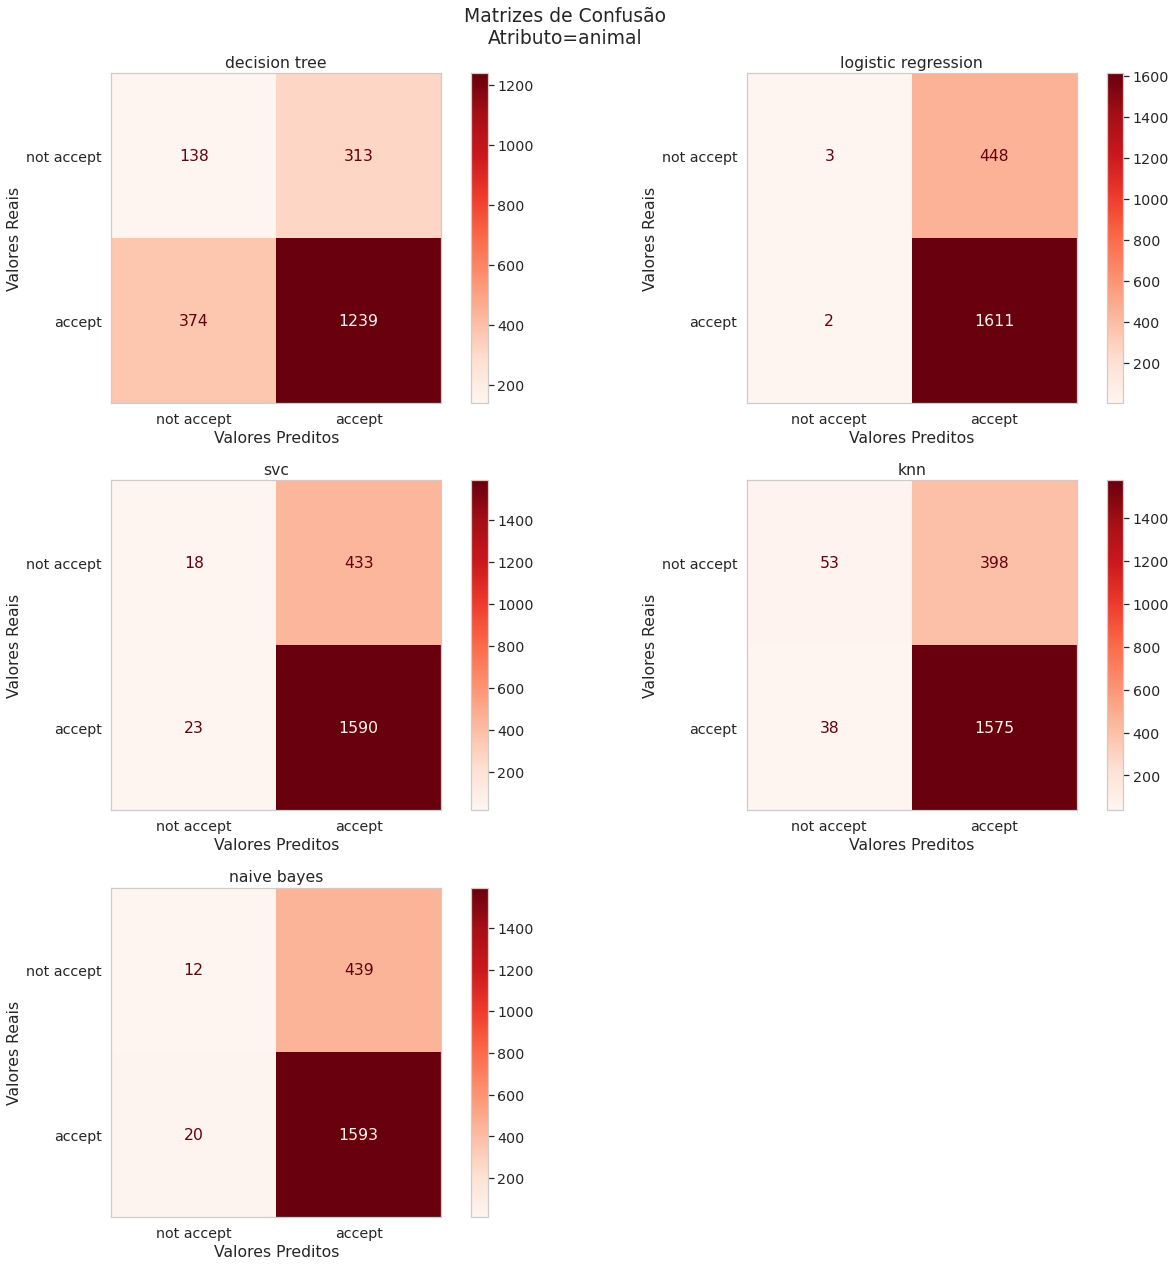

In [14]:
model_names = list(best_classification_animal_models.keys())

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Matrizes de Confusão\nAtributo=animal')
for index, ax in enumerate(axs.flat):
  if index < len(model_names):
    plot_confusion_matrix(best_classification_animal_models[model_names[index]], 
                          X_test_animal, 
                          y_test_animal, 
                          display_labels=['not accept', 'accept'], 
                          cmap='Reds', 
                          ax=ax,
                          values_format='d')
    ax.set_title(' '.join(model_names[index].split("_")[1:]))
    ax.set_xlabel('Valores Preditos')
    ax.set_ylabel('Valores Reais')
    ax.grid(False)
  else:
    ax.set_visible(False)

fig.tight_layout()
plt.show()

#### Atributo Furniture

A seguir, estão os gráficos das métricas para cada modelo. Os modelos foram muito ruins ao classificar o atributo `furniture `, para isso, consideramos dois fatores principais: 

1. A classe mais presente no atributo `furniture` é uma classe negativa (`not funished`). As métricas usadas para avaliação do modelo consideram a classe positiva (`funished`). 
2. Por esse mesmo motivo, o modelo tende a classificar mais os dados para esta classe negativa. Isso será melhor analisado nas visualizações das matrizes de confusão.


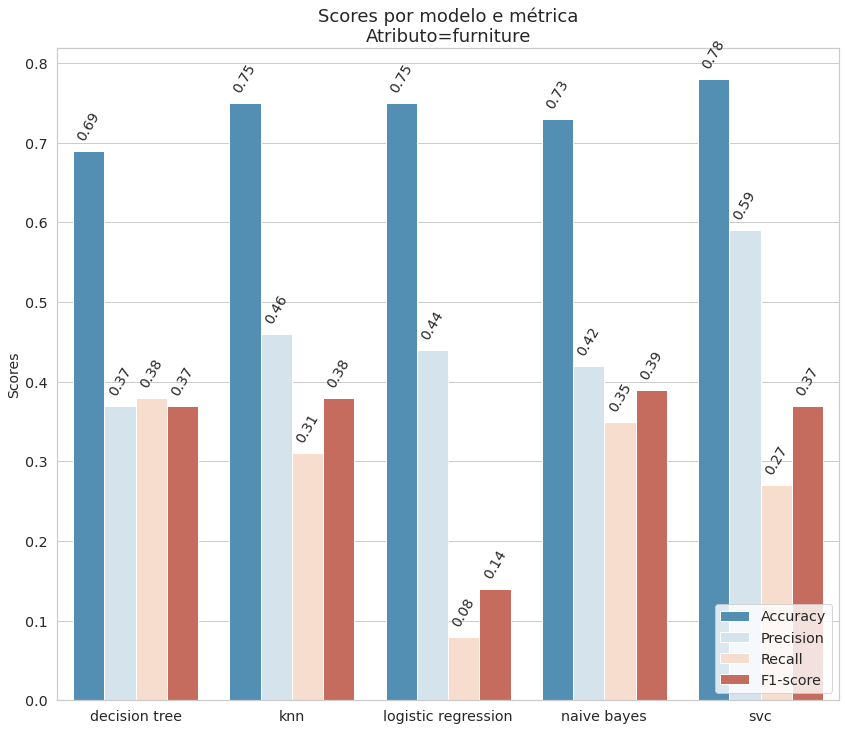

In [15]:
classif_furniture_scores = utils.compute_scores_best_models(X_test_furniture,
                                                   y_test_furniture, 
                                                   best_classification_furniture_models, 
                                                   metrics=[accuracy_score, precision_score, recall_score, f1_score, log_loss],
                                                   metric_names=['acc', 'p', 'r', 'f1', 'bce'])
score_data_furniture = utils.classification_score_data(classif_furniture_scores)

utils.plot_histogram_labels(x_label='Model', 
                            y_label='Score', 
                            labels=score_data_furniture['Score'].to_numpy(), 
                            hue_label='Metric', 
                            data=score_data_furniture, 
                            palette='RdBu_r',
                            title='Scores por modelo e métrica\nAtributo=furniture', 
                            ylabel_title='Scores', 
                            width=14, 
                            height=12)

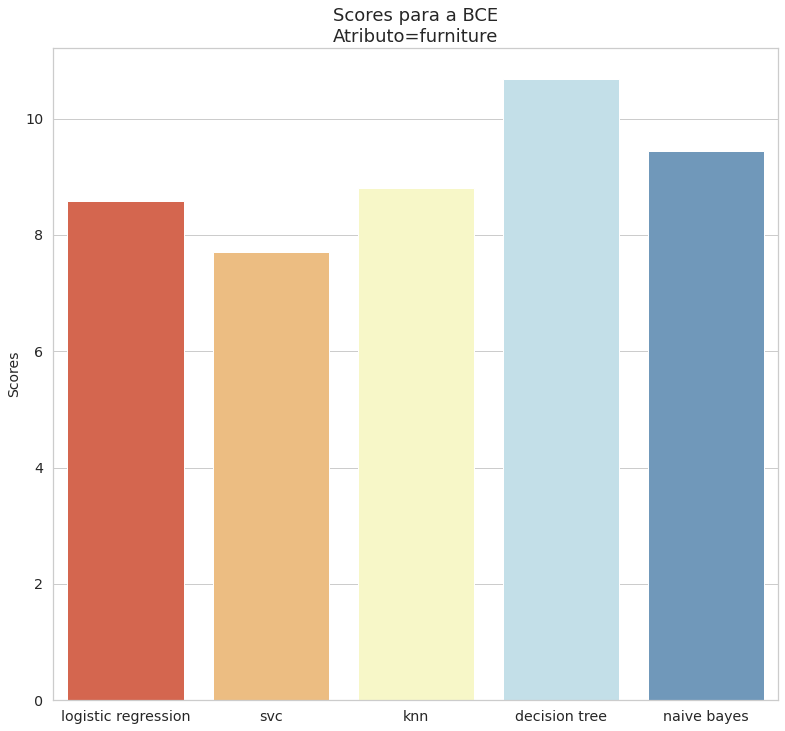

In [16]:
bce_scores_furniture = pd.DataFrame(columns=['Model', 'Score'])

for model, scores in classif_furniture_scores.items():
  bce_scores_furniture = bce_scores_furniture.append({
      'Model': ' '.join(model.split("_")[1:]),
      'Score': float('{:.2f}'.format(scores['bce']))
  }, ignore_index=True)
bce_scores_furniture

sns.set(style='whitegrid', font_scale=1.3)
plt.figure(figsize=(13, 12))
sns.barplot(x='Model', y='Score', data=bce_scores_furniture, palette='RdYlBu')

plt.title('Scores para a BCE\nAtributo=furniture', fontsize=18)
plt.xlabel('')
plt.ylabel('Scores', fontsize=14)

plt.show()

- **Matrizes de confusão:**

  > Abaixo, estão os plots das matrizes de confusão de cada modelo. Como visto acima, todos os modelos tiveram um desempenho ruim. Isso se deve ao fato dos dados estarem desbalanceados, onde a classe mais frequente é `not furnished`.

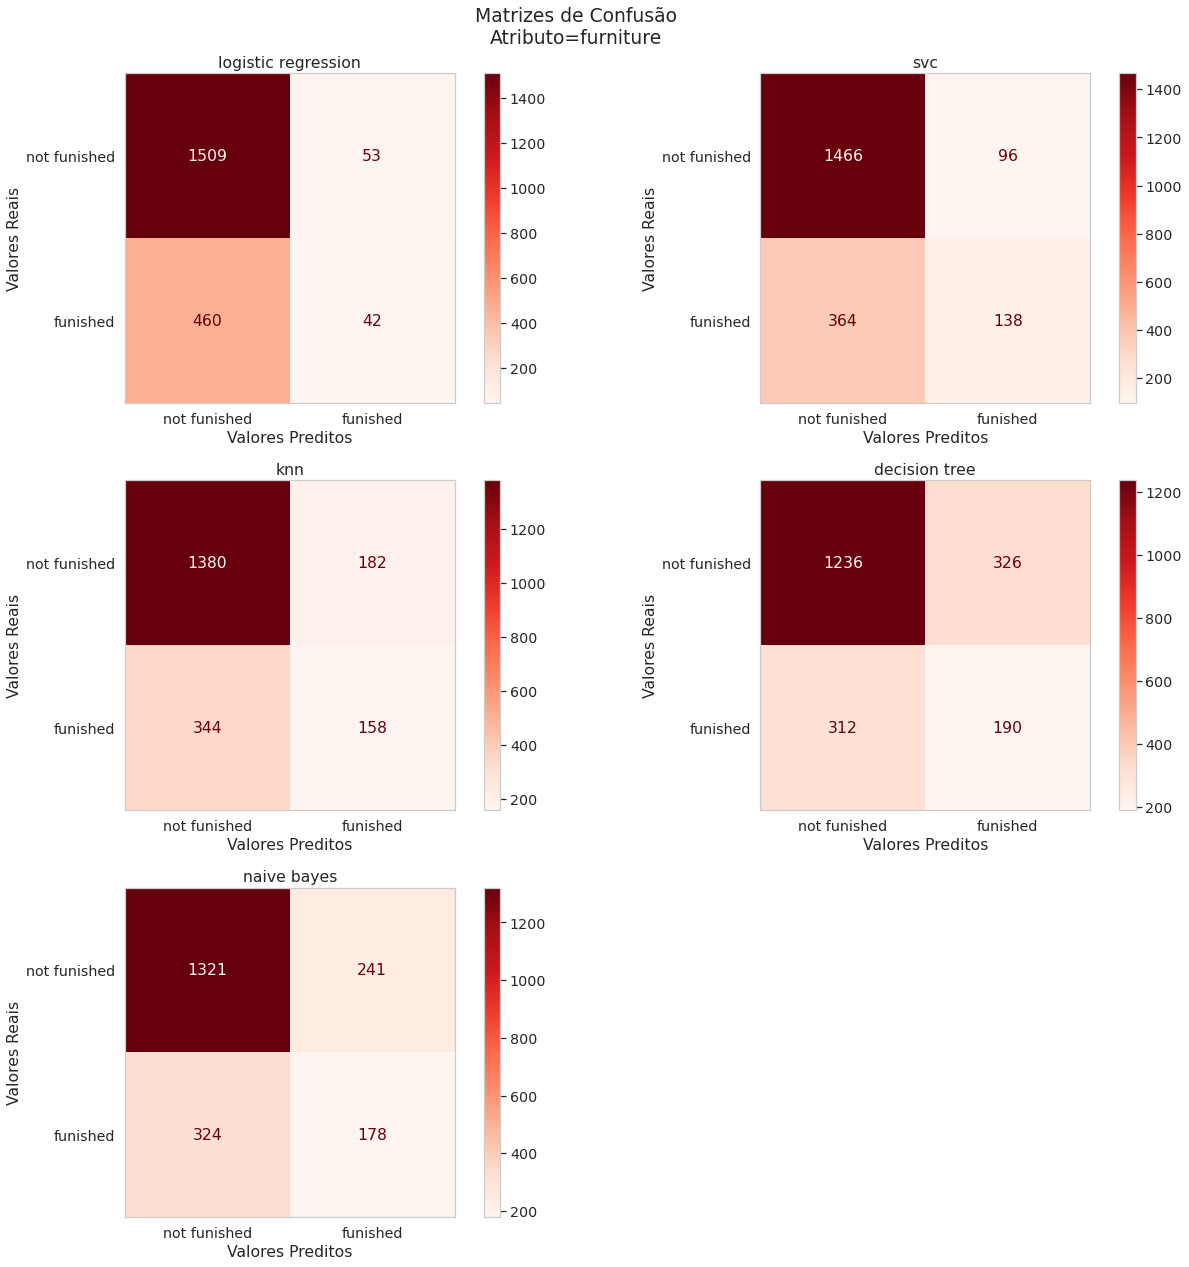

In [17]:
model_names = list(best_classification_furniture_models.keys())

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Matrizes de Confusão\nAtributo=furniture')
for index, ax in enumerate(axs.flat):
  if index < len(model_names):
    plot_confusion_matrix(best_classification_furniture_models[model_names[index]], 
                          X_test_furniture, 
                          y_test_furniture, 
                          display_labels=['not funished', 'funished'], 
                          cmap='Reds',
                          ax=ax,
                          values_format='d')
    ax.set_title(' '.join(model_names[index].split("_")[1:]))
    ax.set_xlabel('Valores Preditos')
    ax.set_ylabel('Valores Reais')
    ax.grid(False)
  else:
    ax.set_visible(False)

fig.tight_layout()
plt.show()

# Considerações Finais

- **Regressão:**
1. Com relação ao modelo que teve a melhor performance para a tarefa de regressão, vemos que o SVM foi superior em todas as métricas!
2. Por outro lado, o SVM também foi o modelo mais demorado, enquanto a Regressão Linear e o KNN executaram muito mais rápido e tiveram resultados relativamente próximos ao SVM.
3. Por mais que o SVM seja demorado, como a *Grid Search* explorou 48 combinações, e a executação dessa *Grid Search* levou cerca de 578 segundos, isso é aproximadamente 12 segundos por modelo, o que é algo bem satisfatório. Além disso, 10 minutos ainda é um tempo aceitável, portanto, não vemos problemas na utilização da SVM para este problema em específico.
4. Contudo, nem tudo são flores. Mesmo o SVM que é um modelo relativamente robusto, o RMSE ainda ficou acima de 2600, juntamente com a MAE por volta de 1600. Isso mostra que o modelo ainda tem cometido alguns erros bem grandes, o que é algo indesejado para o nosso problema.
5. Quando analisamos a distribuição real dos dados e a distribuição gerada pelo nosso modelo, vemos que para aluguéis pequenos, o modelo conseguiu reproduzir bem a distribuição original. O problema surge quando olhamos para os *outliers*, pois o nosso modelo parou por volta de R<span class="tex2jax_ignore">$ 20.000, enquanto na distribuição original existem aluguéis acima de R$ 25.000. Mas, isso também é algo positivo, pois mostra que o nosso modelo está resistindo bem aos *outliers*, sem ser influenciado por eles.
6. Dito isso, acreditamos que os resultados são bastante promissores, mas é interessante termos mais dados de aluguéis altos para melhorar a predição desses valores, de modo que o nosso modelo produza menos erros "extremos".

- **Classificação:**

De antemão, nas tarefas de classificação binária, para ambos os cenários os dados estavam desbalanceados. Mesmo realizando a estratificação no momento de separar os dados entre treino e teste, os modelos ainda tenderam a acertar as classes mais frequentes.
     
> - **Atributo Animal**:
> 1. Na tarefa de classificar se o imóvel aceita animais ou não, em geral, os modelos foram bem parecidos, com exceção da Árvore de Decisão, que acabou sendo inferior aos demais modelos.
> 2. Com relação ao tempo de execução, o SVM era o modelo mais lento, entretanto, com a técnica de *Bagging Classifier*, ele passou a ser o segundo modelo mais lento, perdendo para o KNN, que levou 116 segundos. Contudo, como o KNN executou 60 combinações de parâmetros distintas, isso nos dá cerca de 2 segundos por modelo, já o SVM, mesmo com as otimizações, executou em 97 segundos 32 combinações distintas, ou seja, tivemos em média 3 segundos por modelo.
> 3. Agora em termos de retorno por tempo de treinamento, tanto a Regressão Logística (com 90 combinações!) quanto o *Naive Bayes* foram significativamente mais rápidos, e tiveram resultados similares ao KNN e SVM, ou seja, o tempo extra não levou a um ganho proporcional na performance do modelo.
> 4. Conforme dito, olhando para a matriz de confusão, fica claro que os modelos tem "priorizado" casas que aceitam animais, porque com exceção da Árvore de Decisão, os modelos tem predito vários falsos-positivos, ou seja, várias casas que não aceitam animais acabaram sendo classificadas como casas que aceitam animais.
> 5. Por outro lado, é interessante também observar que a Árvore de Decisão, mesmo tendo sido o modelo com a pior performance, foi a que teve o menor número de falsos-positivos. O problema é que ela acabou também tendo mais falsos-negativos que os outros modelos.
> 6. Por fim, acreditamos que o desempenho dos modelos na tarefa de classificar se uma casa aceita animais ou não foi bastante promissor. É interessante obtermos mais dados sobre casas que não aceitam animais, visando balancear o dataset. Dessa forma, acreditamos que os modelos terão desempenhos ainda mais satisfatórios!

> - **Atributo Furniture**:
> 1. Nesse cenário, os modelos acabaram tendo desempenhos um pouco diferentes. Em geral, todos tiveram uma acurácia acima de 70%, entretanto, os modelos tiveram um desempenho ruim nas outras métricas.
> 2. Com relação aos tempos, o SVM e o KNN também foram os mais demorados para este atributo e, inclusive, demoraram mais do que o treino com o atributo `animal`.
> 3. Mesmo o SVM e o KNN demorando consideravelmente mais que os demais modelos, não apresentaram ganho proporcional com relação a outro modelo que rodou muito mais rápido, como o *Naive Bayes*.
> 4. Novamente, olhando para a matriz de confusão, vemos que os algoritmos também tem priorizado a classe mais frequente, porém, um pouco menos do que aconteceu com o atributo `animal`. 
> 5. Nesse caso, o desempenho dos modelos não foi muito interessante. Mas, novamente, isso também se deve ao fato do *dataset* estar desbalanceado. Estamos um pouco céticos se a melhoria seria tão significativa, entretanto, acreditamos que com um dataset mais balanceado podemos avaliar com mais certeza o desempenho dos modelos na classificação desse atributo.